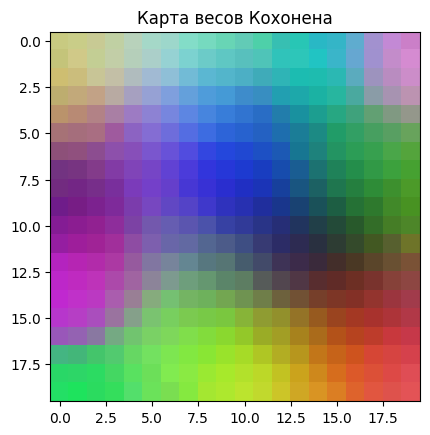

In [5]:
import numpy as np
import matplotlib.pyplot as plt


class KohonenMap:
    def __init__(self, grid_size, input_dim, learning_rate=0.1, radius=1.0):
        self.grid_size = grid_size
        self.input_dim = input_dim
        self.learning_rate = learning_rate
        self.radius = radius
        self.weights = np.random.rand(grid_size, grid_size, input_dim)  

    def find_bmu(self, input_vector):
        distances = np.linalg.norm(self.weights - input_vector, axis=2) 
        return np.unravel_index(np.argmin(distances), distances.shape)

    def update_weights(self, input_vector, bmu, iteration, max_iterations):
        lr = self.learning_rate * np.exp(-iteration / max_iterations)
        sigma = self.radius * np.exp(-iteration / max_iterations)

        for i in range(self.grid_size):
            for j in range(self.grid_size):
                distance_to_bmu = np.linalg.norm(np.array([i, j]) - np.array(bmu))
                if distance_to_bmu <= sigma:
                    influence = np.exp(-distance_to_bmu**2 / (2 * sigma**2))
                    self.weights[i, j] += lr * influence * (input_vector - self.weights[i, j])

    def train(self, data, num_iterations):
        for iteration in range(num_iterations):
            input_vector = data[np.random.randint(0, data.shape[0])]
            bmu = self.find_bmu(input_vector)
            self.update_weights(input_vector, bmu, iteration, num_iterations)

    def visualize(self):
        plt.imshow(self.weights.reshape(self.grid_size, self.grid_size, -1))
        plt.title("Карта весов Кохонена")
        plt.show()


data = np.random.rand(1000, 3) 

som = KohonenMap(grid_size=20, input_dim=3, learning_rate=0.1, radius=5.0)

som.train(data, num_iterations=1000)

som.visualize()
